## 実験概要
RV-SGDAveにおけるノイズの強度について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

ノイズの種類
- 正規分布
    - 平均0
    - 分散
        - 1.5
        - 2.2
        - 2.4
- 対数正規分布
    - 平均0
    - 分散
        - 1.25
        - 1.75
        - 1.90

トライアルの回数は1000,ただし損失の推移についてはそのうちの一回を使用

## 結果
全ての結果において分割しない方が優位でありそう。
- SGD Averaged が効いている？
- 分割によりコア内で学習に使えるサンプル数が少なくなり未学習で終わっている？


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2

w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 100000
c = 5
noise = "normal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]




  0%|          | 0/100 [00:00<?, ?it/s]

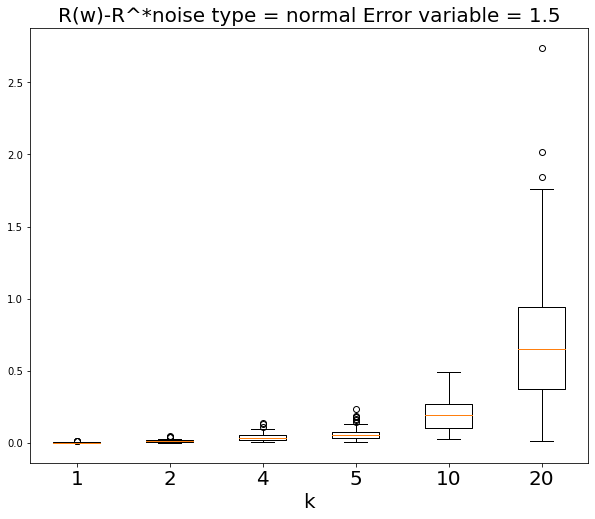

In [3]:
E_var = 1.5
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.004561,0.013627,0.042190,0.062985,0.198730,0.718543
std,0.002965,0.009533,0.025817,0.043245,0.106651,0.468591
min,0.000445,0.001104,0.006279,0.009610,0.026332,0.017329
25%,0.002362,0.006951,0.021817,0.032625,0.104569,0.374996
50%,0.003917,0.011349,0.035116,0.055777,0.192135,0.650526
75%,0.005835,0.018513,0.056880,0.074231,0.269425,0.944452
max,0.015078,0.051906,0.141233,0.237721,0.495659,2.739595


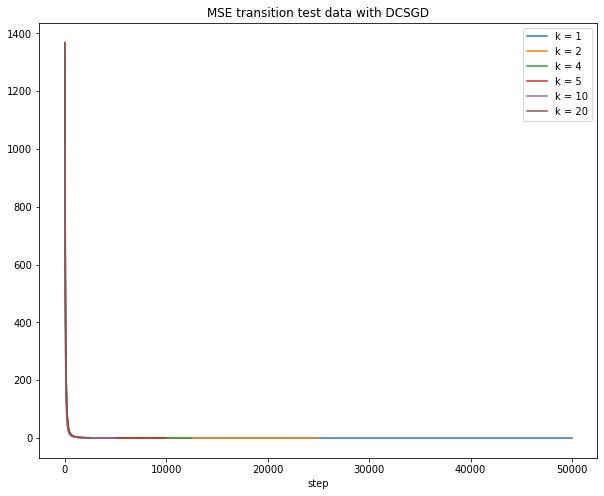

In [5]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

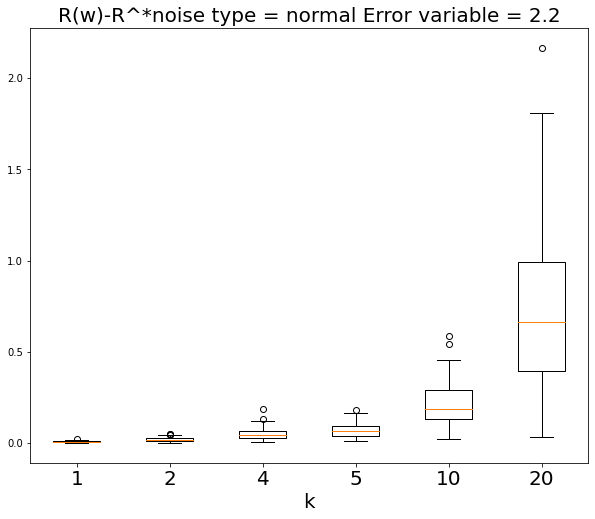

In [6]:
noise = "normal"
E_var = 2.2
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.007724,0.019639,0.050010,0.070325,0.206211,0.730987
std,0.004202,0.010818,0.031582,0.037437,0.118239,0.435440
min,0.000357,0.000533,0.003486,0.010928,0.024237,0.035582
25%,0.004779,0.011818,0.028131,0.039730,0.129719,0.394689
50%,0.006912,0.018050,0.044147,0.065393,0.185414,0.661990
75%,0.010813,0.025311,0.065717,0.095875,0.288568,0.992066
max,0.020653,0.051521,0.187581,0.181370,0.589392,2.166216


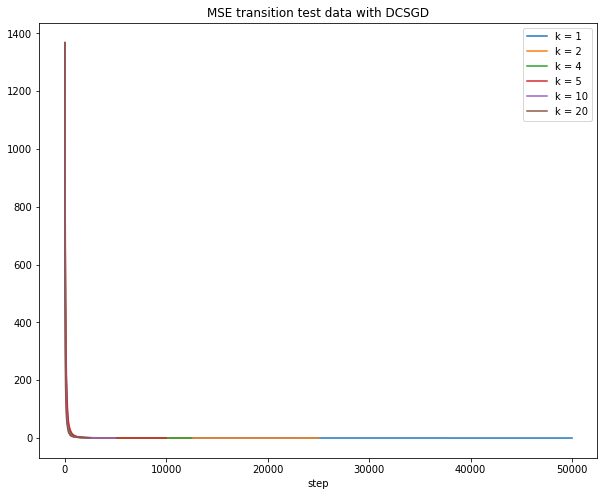

In [8]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

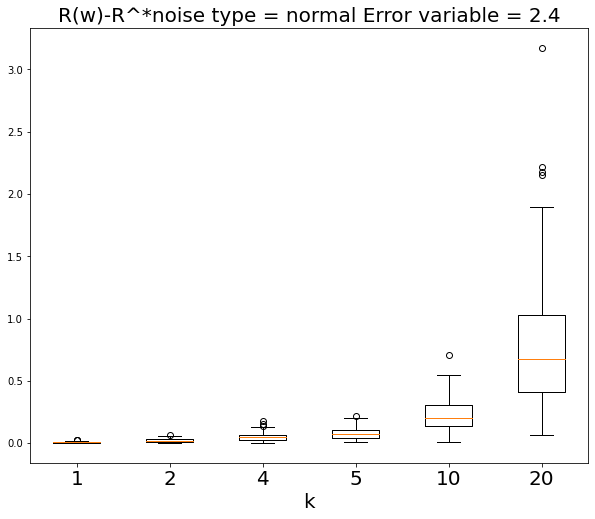

In [9]:
noise = "normal"
E_var = 2.4
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.007802,0.022599,0.051358,0.082457,0.226948,0.801711
std,0.004880,0.013530,0.032494,0.049907,0.130656,0.548726
min,0.000724,0.002703,0.004857,0.006883,0.009304,0.061431
25%,0.004063,0.012104,0.025763,0.043927,0.135706,0.412875
50%,0.007028,0.018215,0.045772,0.073060,0.205375,0.671715
75%,0.010570,0.030474,0.068134,0.109275,0.309410,1.031422
max,0.025526,0.066824,0.175479,0.216229,0.707302,3.174125


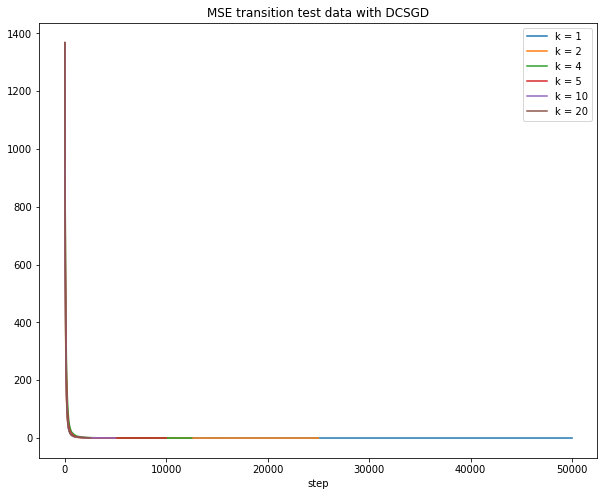

In [11]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

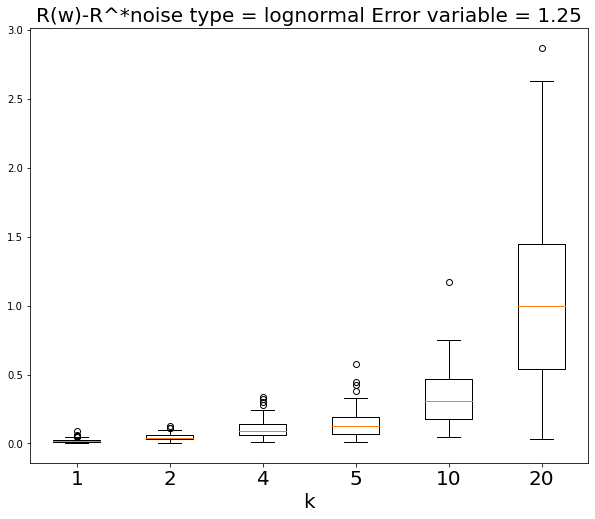

In [12]:
noise = "lognormal"
E_var = 1.25
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [13]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.022499,0.046209,0.103372,0.146732,0.337224,1.074312
std,0.014567,0.025373,0.064979,0.098107,0.204459,0.665475
min,0.003284,0.004317,0.011641,0.011611,0.049390,0.035713
25%,0.012717,0.030627,0.059226,0.072389,0.178151,0.539812
50%,0.019662,0.040061,0.091997,0.123526,0.307301,0.996124
75%,0.026604,0.058826,0.139130,0.193907,0.466628,1.445873
max,0.092433,0.126995,0.334891,0.576445,1.175095,2.871328


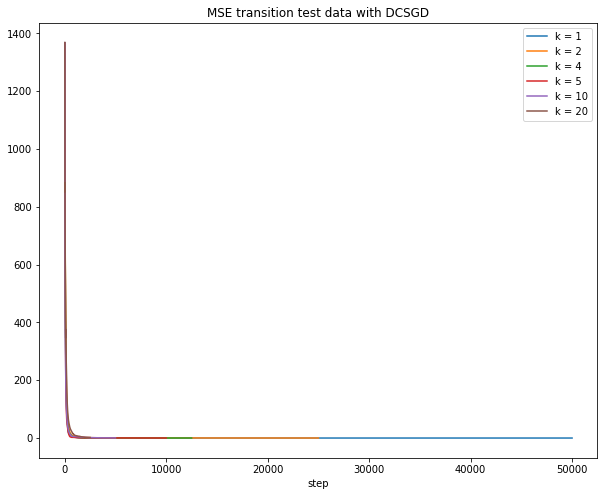

In [14]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

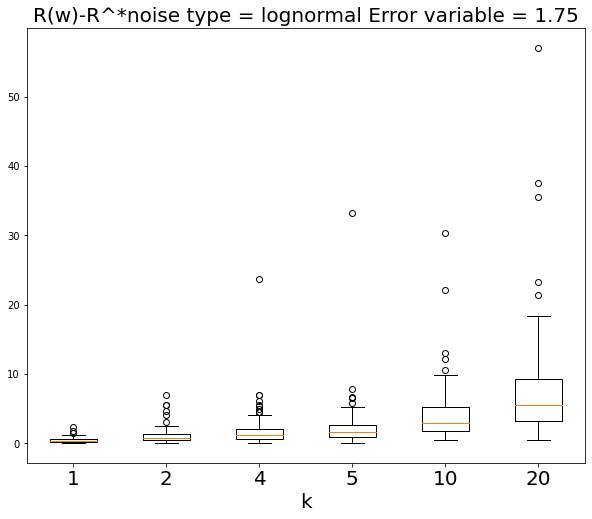

In [15]:
noise = "lognormal"
E_var = 1.75
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [16]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.461899,1.147373,1.841686,2.308213,4.117682,7.631946
std,0.367403,1.176595,2.689737,3.493983,4.123829,7.995836
min,0.047095,0.048525,0.049835,0.110234,0.503187,0.433894
25%,0.189550,0.463323,0.628281,0.881637,1.835754,3.195284
50%,0.394834,0.732279,1.137515,1.634270,3.002560,5.575174
75%,0.606382,1.372480,2.016341,2.685216,5.216037,9.299539
max,2.327800,6.974999,23.729836,33.313620,30.368936,57.105489


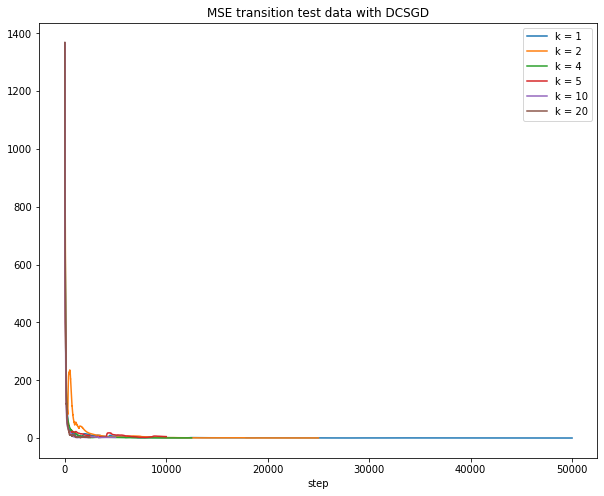

In [17]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/100 [00:00<?, ?it/s]

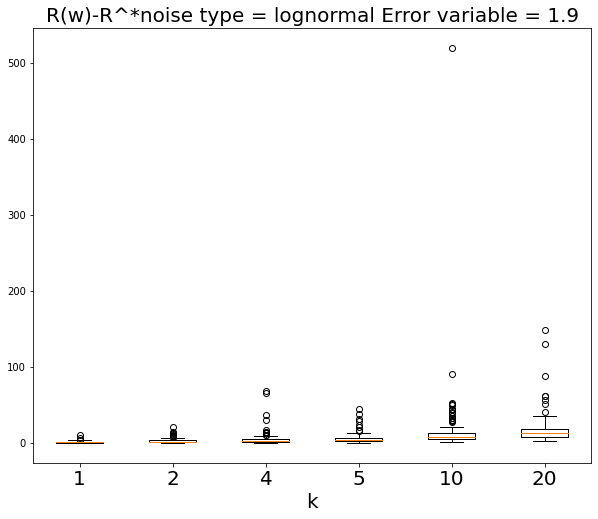

In [18]:
noise = "lognormal"
E_var = 1.90
title = f"noise type = {noise} Error variable = {E_var}"
RV = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 100
_, result_loss_gauss = RV.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [19]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.379303,3.134959,5.925579,6.452352,18.394062,18.561609
std,1.302506,3.319227,10.350949,7.440873,52.684320,22.341776
min,0.096599,0.120134,0.081809,0.619559,1.026148,2.812939
25%,0.658442,1.111305,1.969979,2.338998,5.150349,7.746052
50%,1.013625,2.067818,3.153657,4.103705,7.983033,12.836311
75%,1.787568,3.615183,5.030324,7.170506,13.210305,19.177702
max,10.034208,20.684437,68.965526,44.718827,519.584272,149.225420


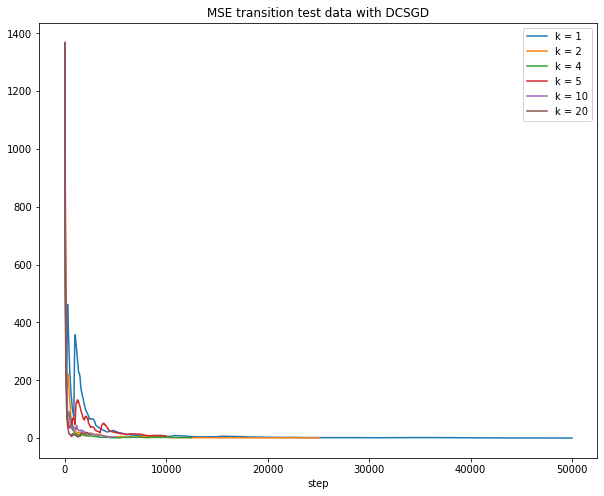

In [20]:
k_list_tr = [1,2,4,5,10,20]
transition_result = RV.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with RVSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)